# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "The Ferrenti approach"
InsertApproach = "01-ferrenti-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-19-03-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)


In [5]:
trainingSet

material_id  full_formula  AtomicOrbitals|HOMO_character  \
0           mp-7            S6                            2.0   
1          mp-14           Se3                            2.0   
2          mp-19           Te3                            2.0   
3          mp-47            C4                            2.0   
4          mp-66            C2                            2.0   
...          ...           ...                            ...   
1576  mp-1275839  Co4Bi24S8O64                            3.0   
1577  mp-1291058  Sr4Mn2Mo2O12                            3.0   
1578  mp-1291630       Fe12O16                            3.0   
1579  mp-1298346     Sr8Co4O16                            3.0   
1580  mp-1539137      Rb1Cr5S8                            3.0   

      AtomicOrbitals|HOMO_element  AtomicOrbitals|HOMO_energy  \
0                              16                   -0.261676   
1                              34                   -0.245806   
2                              52                   -0.226594   
3                               6                   -0.199186   
4                               6                   -0.199186   
...                           ...                         ...   
1576                           27                   -0.322368   
1577                           25                   -0.266540   
1578                           26                   -0.295049   
1579                           27                   -0.322368   
1580                           24                   -0.118123   

      AtomicOrbitals|LUMO_character  AtomicOrbitals|LUMO_element  \
0                               2.0                           16   
1                               2.0                           34   
2                               2.0                           52   
3                               2.0                            6   
4                               2.0                            6   
...                             ...                          ...   
1576                            3.0                           27   
1577                            3.0                           25   
1578                            3.0                           26   
1579                            3.0                           27   
1580                            3.0                           24   

      AtomicOrbitals|LUMO_energy  \
0                      -0.261676   
1                      -0.245806   
2                      -0.226594   
3                      -0.199186   
4                      -0.199186   
...                          ...   
1576                   -0.322368   
1577                   -0.266540   
1578                   -0.295049   
1579                   -0.322368   
1580                   -0.118123   

      AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010  \
0                                              1.000000            
1                                              1.000000            
2                                              1.000000            
3                                              1.000000            
4                                              1.000000            
...                                                 ...            
1576                                           0.034641            
1577                                           0.052116            
1578                                           0.091832            
1579                                           0.057864            
1580                                           0.033111            

      AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010  ...  \
0                                              1.000000           ...   
1                                              1.000000           ...   
2                                              1.000000           ...   
3                                              1.000000           ...   
4          

In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary["MP BG"] = generatedData["MP_Eg"]
Summary.shape

(23623, 12)

In [8]:
#Summary[Summary["pretty_formula"].isin(known_candidates)]
for known_candidate in known_candidates:
    with pd.option_context('display.max_rows', 100, 'display.max_columns', 12):
        print(known_candidate)
        display(Summary[Summary["pretty_formula"]==known_candidate])

SiC


material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
1515      mp-7140        Si2C2            SiC   1.0  0.973350  1.0      1.0   
1647      mp-7631        Si6C6            SiC   1.0  0.981466  1.0      1.0   
2359      mp-9947        Si7C7            SiC   1.0  0.991549  1.0      1.0   
2627     mp-11713        Si5C5            SiC   1.0  0.965429  1.0      1.0   
2628     mp-11714        Si4C4            SiC   1.0  0.967966  1.0      1.0   
13088   mp-567505        Si8C8            SiC   1.0  0.976374  1.0      1.0   
13097   mp-567551      Si16C16            SiC   1.0  0.970215  1.0      1.0   
13295   mp-568619        Si5C5            SiC   1.0  0.971289  1.0      1.0   
13300   mp-568656      Si10C10            SiC   1.0  0.952387  1.0      1.0   
13308   mp-568696      Si14C14            SiC   1.0  0.980868  1.0      1.0   
13313   mp-568735      Si18C18            SiC   1.0  0.970425  1.0      1.0   
13690   mp-570641        Si8C8            SiC   1.0  0.973018  1.0      1.0   
13698   mp-570690        Si9C9            SiC   1.0  0.869897  1.0      1.0   
13720   mp-570791      Si19C19            SiC   1.0  0.952559  1.0      1.0   
13761   mp-570985      Si27C27            SiC   1.0  0.959562  1.0      1.0   
13823   mp-571286      Si36C36            SiC   1.0  0.946660  1.0      1.0   
13828   mp-571298      Si39C39            SiC   1.0  0.944788  1.0      1.0   
14180   mp-582034      Si21C21            SiC   1.0  0.970183  1.0      1.0   
14633   mp-624397      Si11C11            SiC   1.0  0.966725  1.0      1.0   
21514  mp-1197730      Si17C17            SiC   1.0  0.939302  1.0      1.0   
22187  mp-1200168      Si29C29            SiC   1.0  0.947861  1.0      1.0   
22320  mp-1200692      Si17C17            SiC   1.0  0.976295  1.0      1.0   
22373  mp-1200848      Si25C25            SiC   1.0  0.765900  1.0      1.0   
23296  mp-1204356      Si19C19            SiC   1.0  0.961932  1.0      1.0   

       RF    RF Prob  GB    GB Prob   MP BG  
1515   1.0  0.712270  1.0  0.974609  2.3029  
1647   1.0  0.689564  1.0  0.966924  2.1121  
2359   1.0  0.659219  1.0  0.881756  2.1419  
2627   1.0  0.702925  1.0  0.882777  1.9728  
2628   1.0  0.696224  1.0  0.977754  2.3298  
13088  1.0  0.684528  1.0  0.900457  1.8874  
13097  1.0  0.744105  1.0  0.957275  2.0641  
13295  1.0  0.686814  1.0  0.891914  1.8735  
13300  1.0  0.609387  1.0  0.942833  2.0411  
13308  1.0  0.697345  1.0  0.757244  1.9207  
13313  1.0  0.619750  1.0  0.847690  2.0911  
13690  1.0  0.608597  1.0  0.900057  2.0203  
13698  1.0  0.600632  1.0  0.792925  1.9611  
13720  1.0  0.687048  1.0  0.948665  2.0674  
13761  1.0  0.680734  1.0  0.930342  1.9049  
13823  1.0  0.664352  1.0  0.899238  1.8184  
13828  1.0  0.605647  1.0  0.693685  1.6465  
14180  1.0  0.709713  1.0  0.794049  1.7122  
14633  1.0  0.696142  1.0  0.927701  2.0545  
21514  1.0  0.686129  1.0  0.946946  2.0169  
22187  1.0  0.695979  1.0  0.908279  1.9788  
22320  1.0  0.620410  1.0  0.599239  1.9915  
22373  1.0  0.556381  1.0  0.932728  1.9544  
23296  1.0  0.705755  1.0  0.846696  1.8603

SiGe


Empty DataFrame
Columns: [material_id, full_formula, pretty_formula, LOG , LOG Prob, DT , DT Prob, RF , RF Prob, GB , GB Prob, MP BG]
Index: []

C


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
1           mp-24           C8              C   1.0  0.997700  1.0  1.000000   
13250   mp-568410           C8              C   1.0  0.972552  1.0  1.000000   
13539   mp-570002           C8              C   1.0  0.999949  1.0  1.000000   
14696   mp-630227          C60              C   1.0  0.988306  1.0  1.000000   
15432   mp-667273          C60              C   1.0  0.998834  1.0  1.000000   
15673   mp-680372          C60              C   1.0  0.965130  1.0  1.000000   
15747   mp-683919         C140              C   1.0  0.987229  1.0  1.000000   
17988  mp-1008395           C4              C   1.0  0.993946  1.0  1.000000   
18534  mp-1078845           C8              C   1.0  0.999023  1.0  1.000000   
18693  mp-1080826           C8              C   1.0  0.999140  1.0  1.000000   
18775  mp-1095534          C12              C   1.0  0.984255  1.0  1.000000   
18786  mp-1095633          C12              C   1.0  0.998630  1.0  1.000000   
19640  mp-1190171          C16              C   1.0  0.999611  1.0  1.000000   
20410  mp-1194362          C28              C   1.0  0.957075  1.0  1.000000   
21194  mp-1196583         C240              C   1.0  0.994278  0.0  0.000000   
23129  mp-1203645          C48              C   1.0  0.998111  1.0  0.944444   
23563  mp-1205417          C20              C   1.0  0.999682  1.0  0.974170   

       RF    RF Prob  GB    GB Prob   MP BG  
1      1.0  0.631594  1.0  0.635261  2.7785  
13250  1.0  0.748327  1.0  0.841175  0.1231  
13539  1.0  0.743524  1.0  0.951393  3.2084  
14696  1.0  0.636381  1.0  0.869683  0.9100  
15432  1.0  0.679951  1.0  0.867554  1.2370  
15673  1.0  0.731247  1.0  0.919180  0.7132  
15747  1.0  0.648321  1.0  0.886231  1.1035  
17988  1.0  0.854149  1.0  0.920329  2.6076  
18534  1.0  0.801110  1.0  0.941750  3.5883  
18693  1.0  0.694561  1.0  0.745432  3.5408  
18775  1.0  0.694341  1.0  0.711858  0.6566  
18786  1.0  0.723228  1.0  0.885124  2.7039  
19640  1.0  0.716446  1.0  0.684847  4.3282  
20410  1.0  0.594482  1.0  0.746111  2.0672  
21194  1.0  0.758712  1.0  0.936142  1.3517  
23129  1.0  0.655486  1.0  0.941112  1.8637  
23563  1.0  0.682584  1.0  0.883931  4.1975

Si


material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
3454     mp-16220         Si34             Si   1.0  0.999200  1.0      1.0   
17932   mp-999200          Si4             Si   1.0  0.998454  1.0      1.0   
18417  mp-1072544          Si6             Si   1.0  0.999782  0.0      0.3   
18580  mp-1079297          Si8             Si   1.0  0.995843  1.0      1.0   
23228  mp-1204046        Si106             Si   1.0  0.992272  1.0      1.0   

       RF    RF Prob  GB    GB Prob   MP BG  
3454   1.0  0.840044  1.0  0.916599  0.7021  
17932  1.0  0.848954  1.0  0.997537  0.4517  
18417  1.0  0.842094  1.0  0.952656  0.1909  
18580  1.0  0.832128  1.0  0.988620  0.2875  
23228  1.0  0.877437  1.0  0.967428  0.1508

GaN


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
97         mp-804        Ga2N2            GaN   1.0  0.767732  1.0  1.000000   
102        mp-830        Ga1N1            GaN   1.0  0.582619  1.0  1.000000   
349       mp-2853        Ga1N1            GaN   1.0  0.979667  1.0  0.971429   
17982  mp-1007824        Ga2N2            GaN   1.0  0.989756  1.0  1.000000   

       RF    RF Prob  GB    GB Prob   MP BG  
97     1.0  0.595197  1.0  0.813893  1.7376  
102    1.0  0.557244  1.0  0.706024  1.9046  
349    1.0  0.730972  1.0  0.944544  0.5091  
17982  1.0  0.725071  1.0  0.983473  1.3711

GaAs


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
314      mp-2534       Ga1As1           GaAs   1.0  0.968648  0.0  0.000000   
2016     mp-8883       Ga2As2           GaAs   1.0  0.953116  1.0  0.965116   

      RF    RF Prob  GB    GB Prob   MP BG  
314   1.0  0.820825  1.0  0.965224  0.1839  
2016  1.0  0.741824  1.0  0.935140  0.1925

AlN


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
81        mp-661        Al2N2            AlN   1.0  0.915407  1.0  1.000000   
163      mp-1330        Al1N1            AlN   1.0  0.999946  1.0  0.971429   
204      mp-1700        Al1N1            AlN   1.0  0.989708  1.0  1.000000   
2832    mp-13178        Al2N2            AlN   1.0  0.995430  1.0  1.000000   

      RF    RF Prob  GB    GB Prob   MP BG  
81    1.0  0.614929  1.0  0.815063  4.0536  
163   1.0  0.698602  1.0  0.962513  4.5541  
204   1.0  0.744227  1.0  0.964350  3.4683  
2832  1.0  0.731132  1.0  0.962522  3.2687

ZnS


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
2358      mp-9946        Zn6S6            ZnS   1.0  0.958556  1.0  0.971429   
2400     mp-10281        Zn4S4            ZnS   1.0  0.968821  1.0  0.971429   
9328    mp-553880      Zn26S26            ZnS   1.0  0.965054  1.0  0.944444   
9345    mp-553916      Zn24S24            ZnS   1.0  0.956048  1.0  1.000000   
9391    mp-554004      Zn28S28            ZnS   1.0  0.970674  1.0  0.944444   
9440    mp-554115      Zn24S24            ZnS   1.0  0.957599  0.0  0.000000   
9505    mp-554253      Zn26S26            ZnS   1.0  0.956626  1.0  1.000000   
9600    mp-554503      Zn28S28            ZnS   1.0  0.967166  0.0  0.000000   
9644    mp-554608      Zn26S26            ZnS   1.0  0.955727  1.0  1.000000   
9654    mp-554630      Zn24S24            ZnS   1.0  0.952448  0.0  0.000000   
9671    mp-554681      Zn28S28            ZnS   1.0  0.967108  1.0  0.944444   
9685    mp-554713      Zn24S24            ZnS   1.0  0.979849  0.0  0.000000   
9743    mp-554820      Zn28S28            ZnS   1.0  0.932499  0.0  0.000000   
9751    mp-554829      Zn24S24            ZnS   1.0  0.958305  1.0  0.944444   
9779    mp-554889      Zn24S24            ZnS   1.0  0.968922  1.0  0.944444   
9812    mp-554961      Zn28S28            ZnS   1.0  0.959781  1.0  0.944444   
9817    mp-554986      Zn34S34            ZnS   1.0  0.975688  0.0  0.000000   
9823    mp-554999      Zn24S24            ZnS   1.0  0.967331  1.0  0.944444   
9862    mp-555079      Zn28S28            ZnS   1.0  0.956208  1.0  0.944444   
9908    mp-555151      Zn28S28            ZnS   1.0  0.960043  1.0  1.000000   
9938    mp-555214      Zn26S26            ZnS   1.0  0.896209  0.0  0.000000   
9981    mp-555311      Zn26S26            ZnS   1.0  0.961918  1.0  0.944444   
10013   mp-555381      Zn24S24            ZnS   1.0  0.957575  1.0  0.944444   
10083   mp-555543      Zn24S24            ZnS   1.0  0.931110  0.0  0.000000   
10101   mp-555583      Zn24S24            ZnS   1.0  0.967737  1.0  1.000000   
10107   mp-555594      Zn24S24            ZnS   1.0  0.959355  1.0  0.944444   
10123   mp-555628      Zn24S24            ZnS   1.0  0.971707  1.0  0.944444   
10134   mp-555664      Zn24S24            ZnS   1.0  0.940541  0.0  0.000000   
10136   mp-555666      Zn32S32            ZnS   1.0  0.958282  1.0  0.944444   
10177   mp-555773      Zn18S18            ZnS   1.0  0.972021  1.0  0.971429   
10182   mp-555779      Zn16S16            ZnS   1.0  0.947022  1.0  0.944444   
10183   mp-555782      Zn20S20            ZnS   1.0  0.968004  1.0  0.971429   
10292   mp-556000      Zn22S22            ZnS   1.0  0.959315  1.0  0.971429   
10295   mp-556005        Zn8S8            ZnS   1.0  0.961982  1.0  0.971429   
10365   mp-556152      Zn18S18            ZnS   1.0  0.960763  1.0  0.971429   
10367   mp-556155      Zn20S20            ZnS   1.0  0.947146  0.0  0.000000   
10370   mp-556161      Zn14S14            ZnS   1.0  0.945821  1.0  0.944444   
10391   mp-556207      Zn20S20            ZnS   1.0  0.966295  1.0  0.971429   
10434   mp-556280      Zn20S20            ZnS   1.0  0.947893  1.0  1.000000   
10470   mp-556363      Zn18S18            ZnS   1.0  0.963316  1.0  0.971429   
10487   mp-556392      Zn14S14            ZnS   1.0  0.944223  0.0  0.000000   
10489   mp-556395        Zn8S8            ZnS   1.0  0.942548  1.0  0.971429   
10518   mp-556448      Zn18S18            ZnS   1.0  0.959288  1.0  0.944444   
10570   mp-556543      Zn22S22            ZnS   1.0  0.937431  0.0  0.000000   
10651   mp-556716      Zn14S14            ZnS   1.0  0.935927  1.0  0.944444   
10659   mp-556732      Zn20S20            ZnS   1.0  0.954730  1.0  1.000000   
10684   mp-556775      Zn16S16            ZnS   1.0  0.966829  1.0  0.944444   
10690   mp-556784      Zn22S22            ZnS   1.0  0.953371  1.0  0.944444   
10706   mp-556815      Zn14S14            ZnS   1.0  0.946142  0.0  0.000000   
10765 

ZnSe


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
43      mp-380       Zn2Se2           ZnSe   1.0  0.968107  1.0  0.971429   

    RF    RF Prob  GB    GB Prob   MP BG  
43  1.0  0.768239  1.0  0.943896  1.2003

ZnO


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
264       mp-2133        Zn2O2            ZnO   1.0  0.901286  0.0  0.000000   
2830     mp-13161        Zn1O1            ZnO   1.0  0.999143  1.0  0.600000   
18035  mp-1017539        Zn2O2            ZnO   1.0  0.773918  1.0  0.709677   

       RF    RF Prob  GB    GB Prob   MP BG  
264    1.0  0.514186  1.0  0.568740  0.7316  
2830   1.0  0.703762  1.0  0.699222  0.4345  
18035  1.0  0.690448  1.0  0.712979  0.4516

AlP


material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
189      mp-1550        Al1P1            AlP   1.0  0.905269  0.0      0.0   
2013     mp-8880        Al2P2            AlP   1.0  0.966184  0.0      0.0   

      RF    RF Prob  GB    GB Prob   MP BG  
189   1.0  0.690262  1.0  0.910280  1.8232  
2013  1.0  0.758326  1.0  0.776094  2.0228

GaP


material_id full_formula pretty_formula  LOG   LOG Prob  DT   DT Prob  \
307       mp-2490        Ga1P1            GaP   1.0  0.911867  0.0      0.0   
2015      mp-8882        Ga2P2            GaP   1.0  0.947199  0.0      0.0   
18069  mp-1018275        Ga2P2            GaP   1.0  0.956344  0.0      0.0   

       RF    RF Prob  GB    GB Prob   MP BG  
307    1.0  0.803408  1.0  0.989660  1.6843  
2015   1.0  0.748247  1.0  0.975392  1.2984  
18069  1.0  0.741608  1.0  0.941362  0.9426

AlAs


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
270      mp-2172       Al1As1           AlAs   1.0  0.989307  0.0  0.000000   
2014     mp-8881       Al2As2           AlAs   1.0  0.980949  1.0  0.971429   

      RF    RF Prob  GB    GB Prob   MP BG  
270   1.0  0.791938  1.0  0.990463  1.6871  
2014  1.0  0.744491  1.0  0.986616  1.6862

ZnTe


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
2017      mp-8884       Zn2Te2           ZnTe   1.0  0.794895  0.0  0.099526   
2147      mp-9281       Zn3Te3           ZnTe   1.0  0.905365  1.0  0.971429   
13803   mp-571195       Zn3Te3           ZnTe   1.0  0.771324  0.0  0.099526   
18406  mp-1071319       Zn3Te3           ZnTe   1.0  0.927867  1.0  0.971429   

       RF    RF Prob  GB    GB Prob   MP BG  
2017   1.0  0.763609  1.0  0.981522  1.1003  
2147   1.0  0.733858  1.0  0.932381  0.2878  
13803  1.0  0.746215  1.0  0.960338  1.0679  
18406  1.0  0.659251  1.0  0.940168  0.2938

CdS


material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
41       mp-370        Cd1S1            CdS   1.0  0.995058  1.0  0.971429   
82       mp-672        Cd2S2            CdS   1.0  0.955189  1.0  0.965116   
304     mp-2469        Cd1S1            CdS   1.0  0.951448  1.0  0.965116   

     RF    RF Prob  GB    GB Prob   MP BG  
41   1.0  0.881802  1.0  0.984883  0.3683  
82   1.0  0.796147  1.0  0.983556  1.1162  
304  1.0  0.818207  1.0  0.991183  1.0453

In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
36         mp-344         B4N4             BN   1.0  0.949684  1.0  1.000000   
122        mp-984         B2N2             BN   1.0  0.999351  1.0  1.000000   
179       mp-1434        Mo1S2           MoS2   1.0  0.523364  0.0  0.285714   
201       mp-1599         B4N4             BN   1.0  0.801244  1.0  1.000000   
202       mp-1639         B1N1             BN   1.0  0.991361  1.0  0.937500   
326       mp-2653         B2N2             BN   1.0  0.948687  0.0  0.222222   
1760      mp-7991         B2N2             BN   1.0  0.996480  1.0  1.000000   
2321      mp-9813         W1S2            WS2   1.0  0.875346  0.0  0.285714   
2829     mp-13151         B4N4             BN   1.0  0.967020  0.0  0.222222   
4782     mp-20305       In1As1           InAs   1.0  0.915348  0.0  0.099526   
13475   mp-569655         B4N4             BN   1.0  0.999337  1.0  1.000000   
14338   mp-604884         B2N2             BN   1.0  0.997531  1.0  1.000000   
14687   mp-629015         B2N2             BN   1.0  0.998637  1.0  1.000000   
15074   mp-644751         B4N4             BN   1.0  0.999094  0.0  0.222222   
15786   mp-685145         B1N1             BN   1.0  0.995519  1.0  1.000000   
18356  mp-1060281         B1N1             BN   1.0  0.999432  0.0  0.285714   
18431  mp-1077506         B3N3             BN   0.0  0.484061  1.0  0.937500   

       RF    RF Prob  GB    GB Prob   MP BG  
36     1.0  0.726256  1.0  0.984168  3.5021  
122    1.0  0.793021  1.0  0.982476  4.4938  
179    1.0  0.643917  1.0  0.988160  1.5776  
201    0.0  0.404047  0.0  0.210331  1.6009  
202    1.0  0.690318  1.0  0.553256  4.6482  
326    1.0  0.586366  1.0  0.540586  5.3630  
1760   1.0  0.722444  1.0  0.962653  4.2704  
2321   1.0  0.676060  1.0  0.976416  1.6176  
2829   1.0  0.636368  1.0  0.786799  4.8257  
4782   1.0  0.785164  1.0  0.974585  0.3050  
13475  1.0  0.770529  1.0  0.977421  3.8244  
14338  1.0  0.738634  1.0  0.930143  4.4220  
14687  1.0  0.723182  1.0  0.966383  4.0021  
15074  1.0  0.650723  1.0  0.847364  5.6697  
15786  1.0  0.790718  1.0  0.970977  3.9556  
18356  1.0  0.705134  1.0  0.919525  4.0137  
18431  1.0  0.538673  0.0  0.475741  1.0837

## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
display(RF_DT_GB_LOG)

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
0       mvc-12905          Fe4O8           FeO2   1.0  0.597325  1.0   
1           mp-24             C8              C   1.0  0.997700  1.0   
2           mp-25             N8             N2   1.0  0.999925  1.0   
4          mp-118            P24              P   1.0  0.999405  1.0   
5          mp-154             N8             N2   1.0  0.999632  1.0   
...           ...            ...            ...   ...       ...  ...   
23588  mp-1216303        V2P2O10           VPO5   1.0  0.555120  1.0   
23600  mp-1238430      Rb8C16N24         RbC2N3   1.0  0.972043  1.0   
23618  mp-1304797  Sr12In4Ni4O24      Sr3InNiO6   1.0  0.963774  1.0   
23619  mp-1541522        Bi2P2O8          BiPO4   1.0  0.993755  1.0   
23621  mp-1542038      Cs2Sn2Se6        CsSnSe3   1.0  0.903751  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
0      0.709677  1.0  0.630571  1.0  0.568050  1.2690  
1      1.000000  1.0  0.631594  1.0  0.635261  2.7785  
2      1.000000  1.0  0.639430  1.0  0.867394  7.4564  
4      0.944444  1.0  0.798340  1.0  0.906745  3.7308  
5      0.944444  1.0  0.649203  1.0  0.844380  7.4649  
...         ...  ...       ...  ...       ...     ...  
23588  0.900000  1.0  0.702565  1.0  0.928802  1.3410  
23600  0.944444  1.0  0.622595  1.0  0.678374  4.1979  
23618  0.944444  1.0  0.822830  1.0  0.945229  0.6870  
23619  0.937500  1.0  0.869584  1.0  0.985084  4.0039  
23621  0.941176  1.0  0.720311  1.0  0.912858  1.2725  

[6804 rows x 12 columns]

In [11]:
Summary[(Summary["RF Prob"] > 0.7) & 
        (Summary["DT Prob"] > 0.7) & 
        (Summary["GB Prob"] > 0.7) & 
        (Summary["LOG Prob"] > 0.7)]

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
4          mp-118            P24              P   1.0  0.999405  1.0   
6          mp-157             P4              P   1.0  0.998850  1.0   
8          mp-181          K3Ga9           KGa3   1.0  0.928048  1.0   
9          mp-189         Si4Ru4           SiRu   1.0  0.799428  1.0   
11         mp-209        Er8Se12         Er2Se3   1.0  0.998537  1.0   
...           ...            ...            ...   ...       ...  ...   
23557  mp-1205391      Ta4Sb4O16         TaSbO4   1.0  0.995619  1.0   
23558  mp-1205392       Ag4Sb4S8         AgSbS2   1.0  0.880999  1.0   
23618  mp-1304797  Sr12In4Ni4O24      Sr3InNiO6   1.0  0.963774  1.0   
23619  mp-1541522        Bi2P2O8          BiPO4   1.0  0.993755  1.0   
23621  mp-1542038      Cs2Sn2Se6        CsSnSe3   1.0  0.903751  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
4      0.944444  1.0  0.798340  1.0  0.906745  3.7308  
6      1.000000  1.0  0.802773  1.0  0.891134  0.1151  
8      1.000000  1.0  0.822101  1.0  0.977987  0.6231  
9      1.000000  1.0  0.729204  1.0  0.963804  0.2541  
11     1.000000  1.0  0.704171  1.0  0.872230  1.3586  
...         ...  ...       ...  ...       ...     ...  
23557  0.981132  1.0  0.849744  1.0  0.977853  2.9971  
23558  1.000000  1.0  0.783214  1.0  0.950071  1.4308  
23618  0.944444  1.0  0.822830  1.0  0.945229  0.6870  
23619  0.937500  1.0  0.869584  1.0  0.985084  4.0039  
23621  0.941176  1.0  0.720311  1.0  0.912858  1.2725  

[3000 rows x 12 columns]

In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
0       mvc-12905          Fe4O8           FeO2   1.0  0.597325  1.0   
1           mp-24             C8              C   1.0  0.997700  1.0   
2           mp-25             N8             N2   1.0  0.999925  1.0   
4          mp-118            P24              P   1.0  0.999405  1.0   
5          mp-154             N8             N2   1.0  0.999632  1.0   
...           ...            ...            ...   ...       ...  ...   
23614  mp-1289745   Ba4Fe2Mo2O12      Ba2FeMoO6   0.0  0.258149  1.0   
23616  mp-1296711       La2Co2O6         LaCoO3   0.0  0.128771  1.0   
23618  mp-1304797  Sr12In4Ni4O24      Sr3InNiO6   1.0  0.963774  1.0   
23619  mp-1541522        Bi2P2O8          BiPO4   1.0  0.993755  1.0   
23621  mp-1542038      Cs2Sn2Se6        CsSnSe3   1.0  0.903751  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
0      0.709677  1.0  0.630571  1.0  0.568050  1.2690  
1      1.000000  1.0  0.631594  1.0  0.635261  2.7785  
2      1.000000  1.0  0.639430  1.0  0.867394  7.4564  
4      0.944444  1.0  0.798340  1.0  0.906745  3.7308  
5      0.944444  1.0  0.649203  1.0  0.844380  7.4649  
...         ...  ...       ...  ...       ...     ...  
23614  0.974170  1.0  0.746559  1.0  0.876495  0.9037  
23616  0.705882  1.0  0.643072  1.0  0.777653  0.2793  
23618  0.944444  1.0  0.822830  1.0  0.945229  0.6870  
23619  0.937500  1.0  0.869584  1.0  0.985084  4.0039  
23621  0.941176  1.0  0.720311  1.0  0.912858  1.2725  

[7895 rows x 12 columns]

In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
4          mp-118            P24              P   1.0  0.999405  1.0   
6          mp-157             P4              P   1.0  0.998850  1.0   
8          mp-181          K3Ga9           KGa3   1.0  0.928048  1.0   
14         mp-226          Fe4S8           FeS2   1.0  0.933205  1.0   
15         mp-230         Sb8O16           SbO2   1.0  0.929415  1.0   
...           ...            ...            ...   ...       ...  ...   
23551  mp-1205378   Lu2Cu2Pb2Se6      LuCuPbSe3   1.0  0.952358  1.0   
23557  mp-1205391      Ta4Sb4O16         TaSbO4   1.0  0.995619  1.0   
23558  mp-1205392       Ag4Sb4S8         AgSbS2   1.0  0.880999  1.0   
23618  mp-1304797  Sr12In4Ni4O24      Sr3InNiO6   1.0  0.963774  1.0   
23619  mp-1541522        Bi2P2O8          BiPO4   1.0  0.993755  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
4      0.944444  1.0  0.798340  1.0  0.906745  3.7308  
6      1.000000  1.0  0.802773  1.0  0.891134  0.1151  
8      1.000000  1.0  0.822101  1.0  0.977987  0.6231  
14     0.974170  1.0  0.780783  1.0  0.967491  0.4573  
15     0.974170  1.0  0.795708  1.0  0.942324  1.9048  
...         ...  ...       ...  ...       ...     ...  
23551  0.971429  1.0  0.820079  1.0  0.943758  1.1041  
23557  0.981132  1.0  0.849744  1.0  0.977853  2.9971  
23558  1.000000  1.0  0.783214  1.0  0.950071  1.4308  
23618  0.944444  1.0  0.822830  1.0  0.945229  0.6870  
23619  0.937500  1.0  0.869584  1.0  0.985084  4.0039  

[1979 rows x 12 columns]

In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
0       mvc-12905          Fe4O8           FeO2   1.0  0.597325  1.0   
1           mp-24             C8              C   1.0  0.997700  1.0   
2           mp-25             N8             N2   1.0  0.999925  1.0   
3          mp-111            Ne1             Ne   1.0  1.000000  0.0   
4          mp-118            P24              P   1.0  0.999405  1.0   
...           ...            ...            ...   ...       ...  ...   
23617  mp-1299874  Li4La16Co4O32      LiLa4CoO8   0.0  0.273050  0.0   
23618  mp-1304797  Sr12In4Ni4O24      Sr3InNiO6   1.0  0.963774  1.0   
23619  mp-1541522        Bi2P2O8          BiPO4   1.0  0.993755  1.0   
23620  mp-1541714      Cs3As2Cl9      Cs3As2Cl9   1.0  0.824289  0.0   
23621  mp-1542038      Cs2Sn2Se6        CsSnSe3   1.0  0.903751  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob    MP BG  
0      0.709677  1.0  0.630571  1.0  0.568050   1.2690  
1      1.000000  1.0  0.631594  1.0  0.635261   2.7785  
2      1.000000  1.0  0.639430  1.0  0.867394   7.4564  
3      0.285714  1.0  0.725925  1.0  0.989346  11.8025  
4      0.944444  1.0  0.798340  1.0  0.906745   3.7308  
...         ...  ...       ...  ...       ...      ...  
23617  0.000000  1.0  0.573656  1.0  0.647588   1.2604  
23618  0.944444  1.0  0.822830  1.0  0.945229   0.6870  
23619  0.937500  1.0  0.869584  1.0  0.985084   4.0039  
23620  0.099526  1.0  0.555974  1.0  0.656891   2.6408  
23621  0.941176  1.0  0.720311  1.0  0.912858   1.2725  

[11443 rows x 12 columns]

In [15]:
Summary[Summary["LOG "]==1][:20]

material_id full_formula pretty_formula  LOG   LOG Prob  DT    DT Prob  \
0    mvc-12905        Fe4O8           FeO2   1.0  0.597325  1.0  0.709677   
1        mp-24           C8              C   1.0  0.997700  1.0  1.000000   
2        mp-25           N8             N2   1.0  0.999925  1.0  1.000000   
3       mp-111          Ne1             Ne   1.0  1.000000  0.0  0.285714   
4       mp-118          P24              P   1.0  0.999405  1.0  0.944444   
5       mp-154           N8             N2   1.0  0.999632  1.0  0.944444   
6       mp-157           P4              P   1.0  0.998850  1.0  1.000000   
7       mp-160          B12              B   1.0  0.991335  1.0  1.000000   
8       mp-181        K3Ga9           KGa3   1.0  0.928048  1.0  1.000000   
9       mp-189       Si4Ru4           SiRu   1.0  0.799428  1.0  1.000000   
10      mp-200       La4P28           LaP7   1.0  0.980989  0.0  0.099526   
11      mp-209      Er8Se12         Er2Se3   1.0  0.998537  1.0  1.000000   
12      mp-216      Sc16O24          Sc2O3   1.0  0.990101  1.0  0.937500   
14      mp-226        Fe4S8           FeS2   1.0  0.933205  1.0  0.974170   
15      mp-230       Sb8O16           SbO2   1.0  0.929415  1.0  0.974170   
16      mp-236         S4N4             SN   1.0  0.988692  0.0  0.000000   
17      mp-241        Cd1F2           CdF2   1.0  0.997077  1.0  0.705882   
18      mp-243         K8C8             KC   1.0  0.968030  0.0  0.099526   
19      mp-252       Be1Te1           BeTe   1.0  0.977160  0.0  0.000000   
20      mp-254       Nd6F18           NdF3   1.0  0.932018  1.0  0.937500   

    RF    RF Prob  GB    GB Prob    MP BG  
0   1.0  0.630571  1.0  0.568050   1.2690  
1   1.0  0.631594  1.0  0.635261   2.7785  
2   1.0  0.639430  1.0  0.867394   7.4564  
3   1.0  0.725925  1.0  0.989346  11.8025  
4   1.0  0.798340  1.0  0.906745   3.7308  
5   1.0  0.649203  1.0  0.844380   7.4649  
6   1.0  0.802773  1.0  0.891134   0.1151  
7   1.0  0.658858  1.0  0.852737   1.5219  
8   1.0  0.822101  1.0  0.977987   0.6231  
9   1.0  0.729204  1.0  0.963804   0.2541  
10  0.0  0.495546  1.0  0.770477   0.8723  
11  1.0  0.704171  1.0  0.872230   1.3586  
12  1.0  0.715650  1.0  0.937004   3.8140  
14  1.0  0.780783  1.0  0.967491   0.4573  
15  1.0  0.795708  1.0  0.942324   1.9048  
16  1.0  0.803231  1.0  0.963681   2.9471  
17  1.0  0.682588  1.0  0.978164   3.0701  
18  1.0  0.741152  0.0  0.447679   3.3007  
19  1.0  0.717110  1.0  0.980775   2.2113  
20  1.0  0.534593  1.0  0.857490   7.6262

In [16]:
Summary[(Summary["RF Prob"] > 0.75)]

material_id   full_formula pretty_formula  LOG   LOG Prob  DT   \
4          mp-118            P24              P   1.0  0.999405  1.0   
6          mp-157             P4              P   1.0  0.998850  1.0   
8          mp-181          K3Ga9           KGa3   1.0  0.928048  1.0   
14         mp-226          Fe4S8           FeS2   1.0  0.933205  1.0   
15         mp-230         Sb8O16           SbO2   1.0  0.929415  1.0   
...           ...            ...            ...   ...       ...  ...   
23557  mp-1205391      Ta4Sb4O16         TaSbO4   1.0  0.995619  1.0   
23558  mp-1205392       Ag4Sb4S8         AgSbS2   1.0  0.880999  1.0   
23565  mp-1205425  Ba8Ca1Y2U4O24   Ba8CaY2U4O24   1.0  0.889987  0.0   
23618  mp-1304797  Sr12In4Ni4O24      Sr3InNiO6   1.0  0.963774  1.0   
23619  mp-1541522        Bi2P2O8          BiPO4   1.0  0.993755  1.0   

        DT Prob  RF    RF Prob  GB    GB Prob   MP BG  
4      0.944444  1.0  0.798340  1.0  0.906745  3.7308  
6      1.000000  1.0  0.802773  1.0  0.891134  0.1151  
8      1.000000  1.0  0.822101  1.0  0.977987  0.6231  
14     0.974170  1.0  0.780783  1.0  0.967491  0.4573  
15     0.974170  1.0  0.795708  1.0  0.942324  1.9048  
...         ...  ...       ...  ...       ...     ...  
23557  0.981132  1.0  0.849744  1.0  0.977853  2.9971  
23558  1.000000  1.0  0.783214  1.0  0.950071  1.4308  
23565  0.000000  1.0  0.750071  1.0  0.969662  2.0349  
23618  0.944444  1.0  0.822830  1.0  0.945229  0.6870  
23619  0.937500  1.0  0.869584  1.0  0.985084  4.0039  

[2587 rows x 12 columns]

[1.0, 0.6363489499192245, 0.5215716486902927, 0.4765373301582855, 0.6817912970004225, 0.6451884017369379, 0.8014427791007144, 1.0, 1.0, 0.7978190630048465, 0.77335761311108]


LOG LOG LOG LOG   LOG LOG LOG DT   LOG LOG RF DT   \
LOG LOG LOG LOG                1.0         0.636349        0.521572   
LOG LOG LOG DT                 1.0         0.636349        0.521572   
LOG LOG RF DT                  1.0         0.636349        0.521572   
LOG RF GB DT                   1.0         0.636349        0.521572   
DT GB DT DT                    1.0         0.636349        0.521572   
DT RF DT DT                    1.0         0.636349        0.521572   
RF RF GB GB                    1.0         0.636349        0.521572   
RF RF RF RF                    1.0         0.636349        0.521572   
GB GB GB GB                    1.0         0.636349        0.521572   
GB LOG LOG LOG                 1.0         0.636349        0.521572   
RF LOG LOG LOG                 1.0         0.636349        0.521572   

                  LOG RF GB DT   DT GB DT DT   DT RF DT DT   RF RF GB GB   \
LOG LOG LOG LOG        0.476537      0.681791      0.645188      0.801443   
LOG LOG LOG DT         0.476537      0.681791      0.645188      0.801443   
LOG LOG RF DT          0.476537      0.681791      0.645188      0.801443   
LOG RF GB DT           0.476537      0.681791      0.645188      0.801443   
DT GB DT DT            0.476537      0.681791      0.645188      0.801443   
DT RF DT DT            0.476537      0.681791      0.645188      0.801443   
RF RF GB GB            0.476537      0.681791      0.645188      0.801443   
RF RF RF RF            0.476537      0.681791      0.645188      0.801443   
GB GB GB GB            0.476537      0.681791      0.645188      0.801443   
GB LOG LOG LOG         0.476537      0.681791      0.645188      0.801443   
RF LOG LOG LOG         0.476537      0.681791      0.645188      0.801443   

                  RF RF RF RF   GB GB GB GB   GB LOG LOG LOG   RF LOG LOG LOG   
LOG LOG LOG LOG            1.0           1.0         0.797819         0.773358  
LOG LOG LOG DT             1.0           1.0         0.797819         0.773358  
LOG LOG RF DT              1.0           1.0         0.797819         0.773358  
LOG RF GB DT               1.0           1.0         0.797819         0.773358  
DT GB DT DT                1.0           1.0         0.797819         0.773358  
DT RF DT DT                1.0           1.0         0.797819         0.773358  
RF RF GB GB                1.0           1.0         0.797819         0.773358  
RF RF RF RF                1.0           1.0         0.797819         0.773358  
GB GB GB GB                1.0           1.0         0.797819         0.773358  
GB LOG LOG LOG             1.0           1.0         0.797819         0.773358  
RF LOG LOG LOG             1.0           1.0         0.797819         0.773358

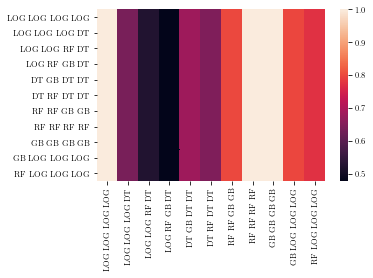

In [17]:
visualize.visualize_heatmap_of_combinations(Summary)

 45%|████▍     | 223/500 [00:00<00:00, 2227.80it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2176.81it/s]


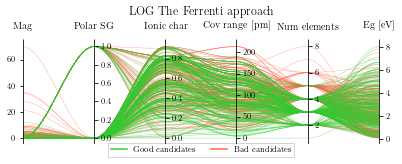

 43%|████▎     | 216/500 [00:00<00:00, 2154.90it/s]

250


100%|██████████| 500/500 [00:00<00:00, 1940.14it/s]


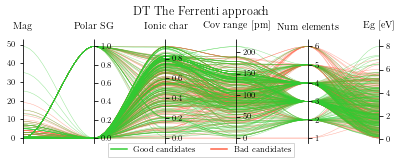

 45%|████▍     | 224/500 [00:00<00:00, 2237.44it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2192.96it/s]


 34%|███▍      | 172/500 [00:00<00:00, 1712.46it/s]

250


100%|██████████| 500/500 [00:00<00:00, 1808.98it/s]


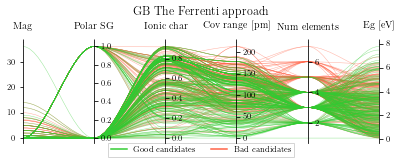

In [18]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], 
                                               InsertApproach+str(abbreviations[i]), 
                                               title=str(abbreviations[i]) + "" + title, 
                                               applyLegend=True)

In [19]:
visualize.plot_histogram_bg_proba(Summary)

In [28]:
visualize.make_parallel_coordinate_matplot_summary(Summary, 
                                               InsertApproach, 
                                               title=str("Summary of t" + title[1:]), 
                                               applyLegend=False)

100%|██████████| 200/200 [00:00<00:00, 2584.78it/s]


/home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/reports/figures/parallel_coordinates/summary-01-ferrenti-approach.pgf


In [29]:
visualize.histogram_of_proba(Summary, InsertApproach)